In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib notebook

In [3]:
# 데이터 준비
N = 300
X, y_ = datasets.make_moons(N, noise=0.3)

Y = y_.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2)

<IPython.core.display.Javascript object>


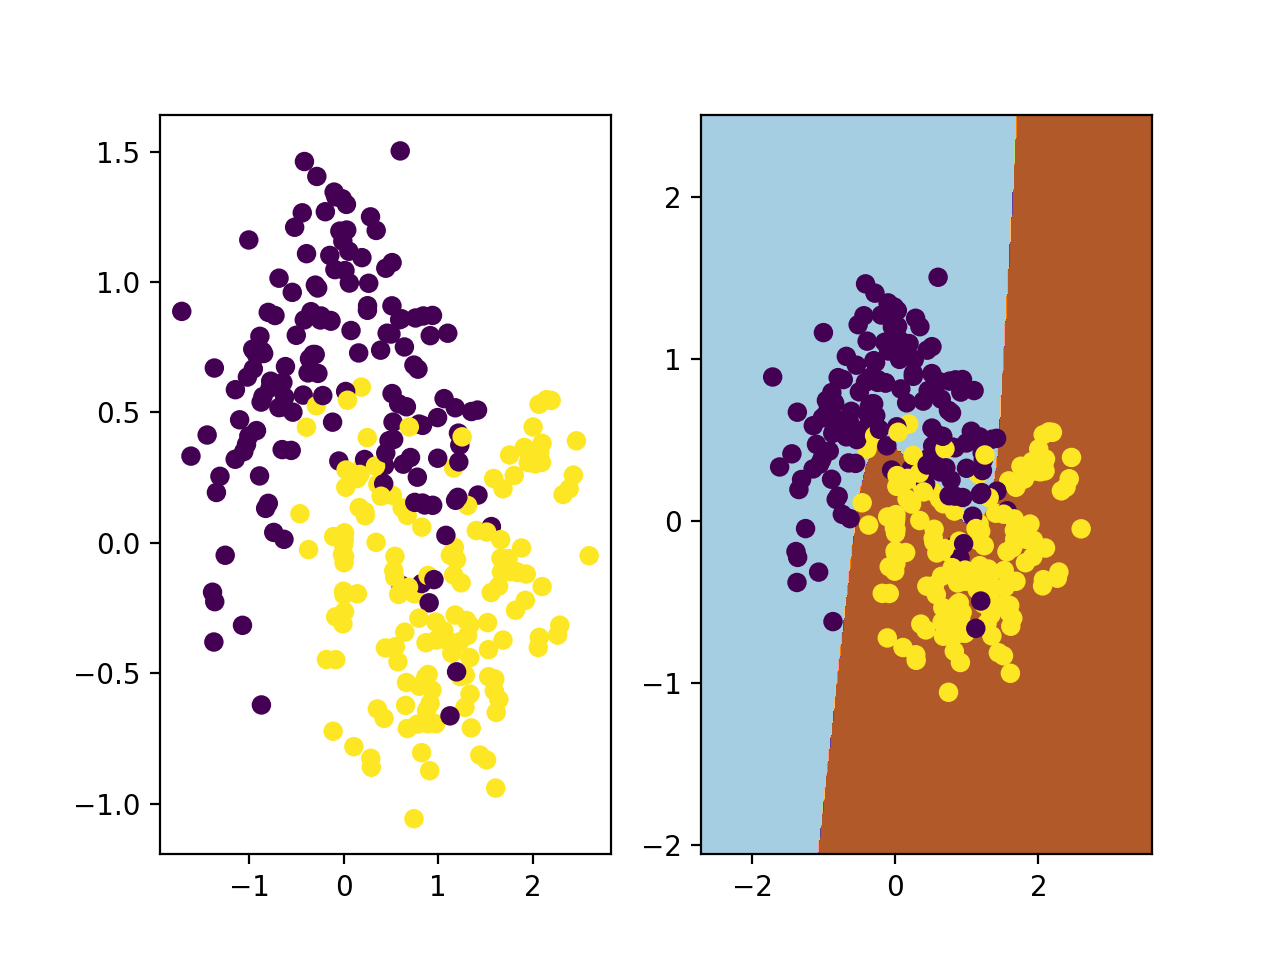

In [4]:
fig, (plot1, plot2) = plt.subplots(1,2)
plot1.scatter(X[:,0], X[:,1], c=y_)

In [5]:
# 모델 생성
num_hidden = 3

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

# 입력층
W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

# 은닉층
V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

# loss + @
cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [6]:
# 정확도
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
# 학습
batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
    X_,  Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [8]:
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: ', accuracy_rate)

accuracy:  0.9166667


In [9]:
# plotting
output = tf.to_float(tf.greater(y, 0.5))

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = output.eval(session=sess, feed_dict={
    x: np.transpose([xx.ravel(), yy.ravel()])
})
plot2.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)
plot2.scatter(X[:, 0], X[:, 1], c=y_)
plt.show()